# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests 
def ndb_search(search_type):
    url="https://api.nal.usda.gov/ndb/search"
    response=requests.get(url,params={
        "api_key":"CxpQoRBOkApT45avkIFGDa6G7W8oBY1saPrzVogS",
        "q":search_type,
        "format":"json"
    })
    response.raise_for_status()
    result=response.json()
    return result["list"]["item"]

In [2]:
#lets test our function, and we can observe that we get the exact same result.
ndb_search("quail eggs")


[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

__Searching Strategy.__ 
I have broken down my algorithm into several steps. I have dealt with the duplicated fruit names at first by adding attributes to distinguish them. Then I have tried to search the items which both include the fruit name and the ",raw" since the foods are all raw. By doing that, there are multiple items extracting for a single food. Then I decide to choose the one with the shortest name, since the food with a super long name always infers it is far different from the raw food we expect. Through this method, except the 3 special cases, we get the correct result for the foods which can be found by the first search. After correcting the 3 special cases, I have loosen the searching criteria for the foods which did not appear in the first search, trying to get the entries which start with the food names. After this process, there are still several special cases which cannot be found. I have observed that these unfound foods can be divided into 2 groups: foods which named with 2 words or not. For the 2 words food, I have changed the searching to the items which have both words in their names, regardless of the sequence. For the else, I have limited the data source to standard reference. Finally, I got the correct ndb number for all of the foods appearing on the data provided.

In [3]:
import pandas as pd
foods=pd.read_csv("fresh.csv")
#Since there are duplicated fruit names, I have made some changes to the cabbage and cumcumber which have more than 1 forms.
#Split cumcumber to cumcumber, peeled and cumcumber, with peel, and split cabbage to cabbage, red and cabbage.
foods.food[foods.form=="Fresh, consumed with peel1"]="cucumber, with peel"
foods.food[foods.form=="Fresh, peeled1"]="cucumber, peeled"
foods.food[foods.form=="Fresh red cabbage1"]="cabbage, red"
fruit=foods.food

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
import re
for i in range(0,len(fruit)):
    if re.search("_",fruit[i]):
        fruit[i]=re.sub("_"," ",fruit[i])
#I have done this in order to eliminate the _ in the fruit name which will hinder the search.

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
list1=[]
for item in fruit:
    result=ndb_search(item)
    for j in result:
        if re.search(", raw", j['name'].encode('ascii','ignore')) and re.search(item, j['name'].encode('ascii','ignore'),re.IGNORECASE):
            j["fruit"]=item
            list1.append(j)
df=pd.DataFrame(list1)

In [8]:
def refine(data):
    '''
    Since I will use this function for several times in the rest of my algorithm to calculate the item 
    which has the shortest length, I have defined this function.
    '''
    length=[]
    for i, row in data.name.iteritems():
        length.append(len(row.encode('ascii','ignore')))
    data["length"]=length
    df1=data.loc[data.groupby("fruit")["length"].idxmin()]
    return df1
df1=refine(df)
df1

,ds,fruit,group,name,ndbno,offset,length
15,SR,apricots,Fruits and Fruit Juices,"Apricots, raw",09021,17,13
80,SR,artichoke,Vegetables and Vegetable Products,"Jerusalem-artichokes, raw",11226,2,25
47,SR,asparagus,Vegetables and Vegetable Products,"Asparagus, raw",11011,0,14
75,SR,avocados,Fruits and Fruit Juices,"Avocados, raw, Florida",09039,4,22
20,SR,bananas,Fruits and Fruit Juices,"Bananas, raw",09040,35,12
40,SR,blackberries,Fruits and Fruit Juices,"Blackberries, raw",09042,12,17
45,SR,blueberries,Fruits and Fruit Juices,"Blueberries, raw",09050,35,16
82,SR,brussels sprouts,Vegetables and Vegetable Products,"Brussels sprouts, raw",11098,0,21
62,SR,cabbage,Vegetables and Vegetable Products,"Cabbage, raw",11109,4,12
69,SR,"cabbage, red",Vegetables and Vegetable Products,"Cabbage, red, raw",11112,1,17


In [9]:
#after inspecting the accuracy of the items i found, i found out that the result for artichoke, grapefruit, potato are unexpected.
#therefore i will make specified selection for these 3 items.
df.loc[df['fruit'].isin(['artichoke','grapefruit','potatoes'])]
#since there are less than 20 entries, we can go through them one by one. 
#For grapefruit, I have selected 'Grapefruit, raw, white, California', ndbno:09117.
#For potatoes, I have selected 'Potatoes, flesh and skin, raw', ndbno:11352.
#For artichoke, I have selected 'Artichokes, (globe or french), raw', ndbno:11007.

,ds,fruit,group,name,ndbno,offset,length
31,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, white, California",09117,11,34
32,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, white, Florida",09118,12,31
33,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit juice, white, raw",09128,13,28
34,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit juice, pink, raw",09404,14,27
35,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, pink and red, Florida",09114,15,38
36,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, white, all areas",09116,16,33
37,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, pink and red and white, all a...",09111,18,50
38,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, pink and red, all areas",09112,19,40
39,SR,grapefruit,Fruits and Fruit Juices,"Grapefruit, raw, pink and red, California and ...",09113,20,53
56,SR,potatoes,Vegetables and Vegetable Products,"Potatoes, flesh and skin, raw",11352,59,29


In [10]:
df1=df1[-df1['fruit'].isin(['artichoke','grapefruit','potatoes'])]
df2=df.loc[df['ndbno'].isin(['09117','11352','11007'])]
data1=pd.concat([df1,df2])
#combine the 2 results together to get our final result for the first procedure.

In [12]:
import numpy as np
fruit1=data1.fruit
fruit0=np.array(fruit, dtype=pd.Series)
fruit2=np.setdiff1d(fruit0, fruit1)
#These are the fruits which are not found in the first algorithm.

In [13]:
list2=[]
for i in range(0,len(fruit2)):
    result=ndb_search(fruit2[i])
    for j in range(0,len(result)):
        if re.match(fruit2[i], result[j]['name'].encode('ascii','ignore'),re.IGNORECASE):
            result[j]["fruit"]=fruit2[i]
            list2.append(result[j])
df3=pd.DataFrame(list2)

In [16]:
data2=refine(df3)
data2
#These are the result for the second procedure.

,ds,fruit,group,name,ndbno,offset,length
30,BL,butternut squash,Branded Food Products Database,"BUTTERNUT SQUASH, UPC: 20001209",45215018,116,31
34,BL,collard greens,Branded Food Products Database,"COLLARD GREENS, UPC: 605388188328",45052827,16,33
36,BL,green beans,Branded Food Products Database,"GREEN BEANS, UPC: 041497185146",45052901,131,30
40,BL,kiwi,Branded Food Products Database,"KIWI, UPC: 014668602001",45181160,132,23
46,BL,sweet potatoes,Branded Food Products Database,"SWEET POTATOES, UPC: 072036985910",45051339,109,33


In [25]:
result1=data1.loc[:,['fruit','ndbno']]
result2=data2.loc[:,['fruit','ndbno']]
result=pd.concat([result1,result2])
fruit3=np.setdiff1d(fruit0, result.fruit)
#we separate the words which have 2 words and the single words.
group1=[]
group2=[]
for i in fruit3:
    if re.search(" ",i):
        group1.append(i)
    else:
        group2.append(i)
x=[]
for i in group1:
    x.append(i.split(" "))
#now the foods with more than 1 word are stored in the list x. 

In [26]:
list3=[]
for i in range(0,len(x)):
    result=ndb_search(group1[i])
    for j in range(0,len(result)):
        if re.search(x[i][0], result[j]['name'].encode('ascii','ignore'),re.IGNORECASE)and re.search(x[i][1], result[j]['name'].encode('ascii','ignore'),re.IGNORECASE):
            result[j]["fruit"]=group1[i]
            list3.append(result[j])
df4=pd.DataFrame(list3)

In [27]:
data3=refine(df4)
data3

,ds,fruit,group,name,ndbno,offset,length
1,SR,acorn squash,Vegetables and Vegetable Products,"Squash, winter, acorn, raw",11482,1,26
8,SR,corn sweet,Vegetables and Vegetable Products,"Corn, sweet, white, raw",11900,2,23
211,SR,green peppers,Vegetables and Vegetable Products,"Peppers, sweet, green, raw",11333,88,26
244,BL,lettuce iceberg,Branded Food Products Database,"SHREDDED ICEBERG LETTUCE, UPC: 03003430195",45195533,4,42
289,BL,red peppers,Branded Food Products Database,"WHOLE RED PEPPERS, UPC: 041253375101",45079241,110,36
303,SR,summer squash,Vegetables and Vegetable Products,"Squash, summer, scallop, raw",11475,2,28


In [28]:
def ndb_search_fruit(search_type):
    '''
    I have modified the search function by adding limit to the data source, since there are so many search results
    for apple and other foods with a large amount of formats.
    '''
    url="https://api.nal.usda.gov/ndb/search"
    response=requests.get(url,params={
        "api_key":"CxpQoRBOkApT45avkIFGDa6G7W8oBY1saPrzVogS",
        "q":search_type,
        "ds":"Standard Reference",
        "fg":"Fruits and Fruit Juices",
        "format":"json"
    })
    response.raise_for_status()
    result=response.json()
    return result["list"]["item"]

In [29]:
group2[1]='mango'
#because in the original file mongo was named as mongoes, and searching mongoes does not produce the right result, I have changed it to mongo.

In [30]:
list4=[]
for i in range(0,len(group2)):
    result=ndb_search_fruit(group2[i])
    for j in range(0,len(result)):
        if re.match(group2[i], result[j]['name'].encode('ascii','ignore'),re.IGNORECASE):
            result[j]["fruit"]=group2[i]
            list4.append(result[j])
df5=pd.DataFrame(list4)

In [31]:
data4=refine(df5)
data4

,ds,fruit,group,name,ndbno,offset,length
0,SR,apples,Fruits and Fruit Juices,"Apples, raw, with skin",09003,0,22
18,SR,mango,Fruits and Fruit Juices,"Mangos, raw",09176,0,11


In [34]:
result3=data3.loc[:,['fruit','ndbno']]
result4=data4.loc[:,['fruit','ndbno']]
Final=pd.concat([result1,result2,result3,result4])
Final
#we have successfully got all of the ACCURATE ndb numbers for our items.

,fruit,ndbno
15,apricots,09021
47,asparagus,11011
75,avocados,09039
20,bananas,09040
40,blackberries,09042
45,blueberries,09050
82,brussels sprouts,11098
62,cabbage,11109
69,"cabbage, red",11112
1,cantaloupe,09181


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [35]:
def ndb_report(number):
    '''
    the function is pretty similar with the one for searching. 
    '''
    url="https://api.nal.usda.gov/ndb/V2/reports"
    response=requests.get(url,params={
        "api_key":"CxpQoRBOkApT45avkIFGDa6G7W8oBY1saPrzVogS",
        "ndbno":number,
        "format":"json"
    })
    response.raise_for_status()
    result=response.json()
    result=result["foods"][0]['food']['nutrients']
    return result

In [37]:
ndb_report("09279")[0]
#We can observe that the result is exactly the same as the one

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

__Sorting Strategy.__ 
For this problem, I have decided to do it in 2 ways. The first way is the same as the one mentioned in the instruction, compaing the fruits by calories. The second way is much more complicated. I have found human's daily suggested intake for most of the nutrients appeared in the report, and I will calculate the percentage of each nutrient provided by each food, and add all the percentage together for each food to see which food produces the best and most efficient combination of nutrition.

In [38]:
ndbno=Final['ndbno']
df=pd.DataFrame()
for i in ndbno:
    results=ndb_report(i)
    data=pd.DataFrame(results)
    data['ndbno']=i
    frames = [df,data]
    df=pd.concat(frames)

In [81]:
#I will truncate some of the columns of data set here since we will only use several of them.
report=df.loc[:,['name','unit','value','ndbno']]
#daily.csv is a file in which I have found the suggested daily nutrient intake for human.
nutrient=pd.read_csv("daily.csv",header=None)
nutrient

,0,1
0,Water,3700.0
1,Energy,2080.0
2,Protein,56.0
3,Total lipid (fat),70.0
4,"Carbohydrate, by difference",130.0
5,"Fiber, total dietary",30.0
6,"Sugars, total",90.0
7,"Calcium, Ca",1000.0
8,"Iron, Fe",8.0
9,"Magnesium, Mg",400.0


In [49]:
x = pd.merge(report, Final, how='left', left_on='ndbno', right_on='ndbno')
#making the mongo change in the original dataset for the merging.
foods.food[foods.food=="mangoes"]="mango"
#join the food dataset to get the price and yield for the food.
complete=pd.merge(x, foods, how='left', left_on='fruit', right_on='food')
complete[['yield','lb_per_cup','price_per_cup','price_per_lb',"value"]] = complete[['yield','lb_per_cup','price_per_cup','price_per_lb','value']].apply(pd.to_numeric)
complete.head()

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,name,unit,value,ndbno,fruit,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Water,g,86.35,09021,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,apricots,fruit
1,Energy,kcal,48.00,09021,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,apricots,fruit
2,Protein,g,1.40,09021,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,apricots,fruit
3,Total lipid (fat),g,0.39,09021,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,apricots,fruit
4,"Carbohydrate, by difference",g,11.12,09021,apricots,Fresh1,3.040072,0.93,0.363763,1.189102,apricots,fruit


In [70]:
#Then we can compute the energy provided by each fruit which bought with the same price.
#I have assumed that we use 5 dollars to buy each food, and the calorie should be 5/price_per_lb*yield*calorie
calorie=complete.loc[complete['name'] == "Energy"]
calorie["score"]=5/calorie["price_per_lb"]*calorie["yield"]*calorie["value"]
calorie["score"]= calorie["score"].astype(int)
calorie=calorie.sort(['type'])
#I have sorted the data frame since I want to show the difference between fruit and vegetables by color. 

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [72]:
t=calorie['type']
colors=[]
for i in t:
    if i=='fruit':
        colors.append('b')
    else:
        colors.append('g')
#I have tried to use different colors for fruit and vegetable in my barplot, so I have created a list of blue and green colors which correspond with fruit and vegetables.

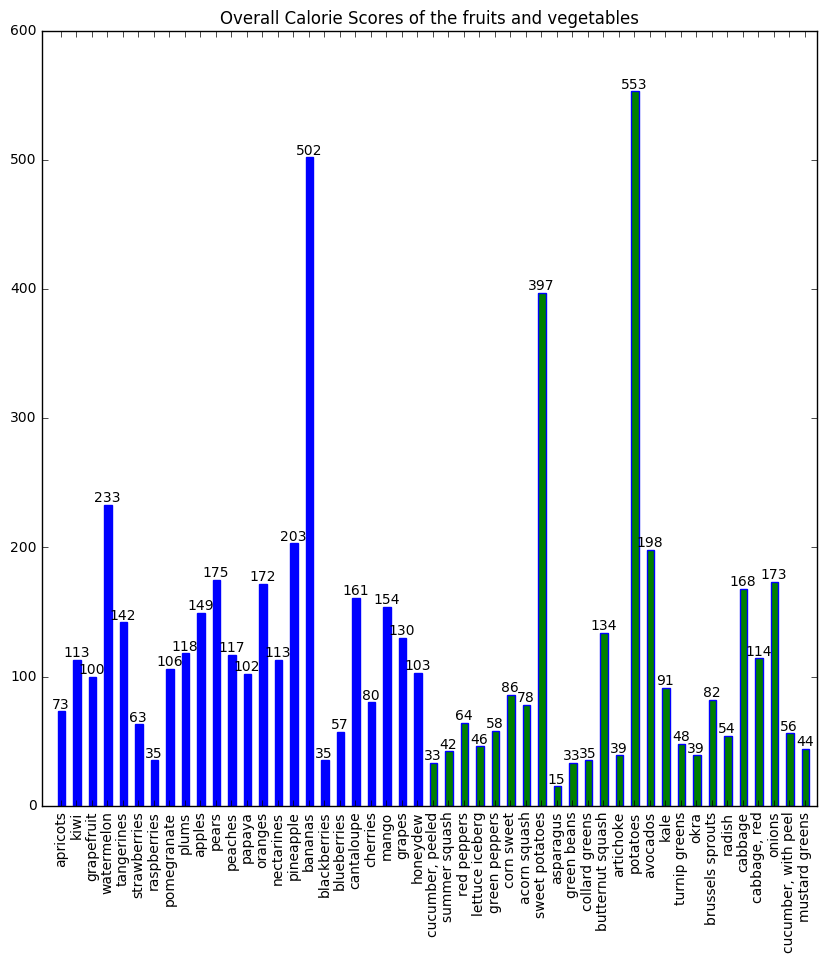

In [73]:

import numpy as np
from matplotlib import pyplot as plt
n = len(calorie['score'])
X = np.arange(n)+1
score=calorie['score'].tolist()
plt.figure(figsize=(10,10))
plt.bar(X,score,width = 0.5,color = colors,edgecolor = 'blue')
for x,y in zip(X,score):
    plt.text(x+0.2, y,'%.0f' % y, ha='center', va= 'bottom')
plt.xticks(X+0.2,calorie.food, rotation='vertical')
plt.title('Overall Calorie Scores of the fruits and vegetables')
plt.show()

According to the plot, we can observe that among the fruits, banana provides the best combination of nutrition, yield, and price, and the top 3 are banana, watermelon, and pinneaple. Among the vegetables, potatoes are the best under that criteria, and the top3 are potatoes, sweet potatoes, and avocadoes. Overall speaking, potatoes are the best among all foods.

In [82]:
#Now we start to evaluate the food in the second way.
nutrient.columns=['name', 'daily']
#complete=pd.merge(x, foods, how='left', left_on='fruit', right_on='food')
F=pd.merge(complete, nutrient, how='inner', left_on='name', right_on='name')

In [88]:
#Then we calculate the percentage. Please note that I have placed the same weight on every nutrient.
F["score"]=5/F["price_per_lb"]*F["yield"]*F["value"]/F["daily"]
F.sort(['score'],ascending=0).head()
#I have found out that there are some extremely high scores, and the exsistence of these scores will distort the result. Therefore I have changed all the scores which are higher than 1 to 1.

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,unit,value,ndbno,fruit,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,daily,score
1081,Vitamin K (phylloquinone),µg,704.8,11233,kale,Fresh1,2.807302,1.050000,0.286601,0.766262,kale,vegetables,120.0,10.983857
1074,Vitamin K (phylloquinone),µg,76.0,11109,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,cabbage,vegetables,120.0,4.257864
1082,Vitamin K (phylloquinone),µg,257.5,11270,mustard greens,Fresh1,2.569235,0.840000,0.308647,0.944032,mustard greens,vegetables,120.0,3.507853
1097,Vitamin K (phylloquinone),µg,251.0,11568,turnip greens,Fresh1,2.471749,0.750000,0.319670,1.053526,turnip greens,vegetables,120.0,3.173360
1073,Vitamin K (phylloquinone),µg,177.0,11098,brussels sprouts,Fresh1,2.763553,1.060000,0.341717,0.890898,brussels sprouts,vegetables,120.0,2.828786


In [90]:
F.score[F.score>1]=1

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [118]:
# Then we can calculate the sum of the scores for nutrienta for each foods.
result=pd.DataFrame(F.groupby(['food','type'])['score'].sum())
result.reset_index(inplace=True)  
result=result.sort(['type'])
t=result['type']
colors=[]
for i in t:
    if i=='fruit':
        colors.append('b')
    else:
        colors.append('g')

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


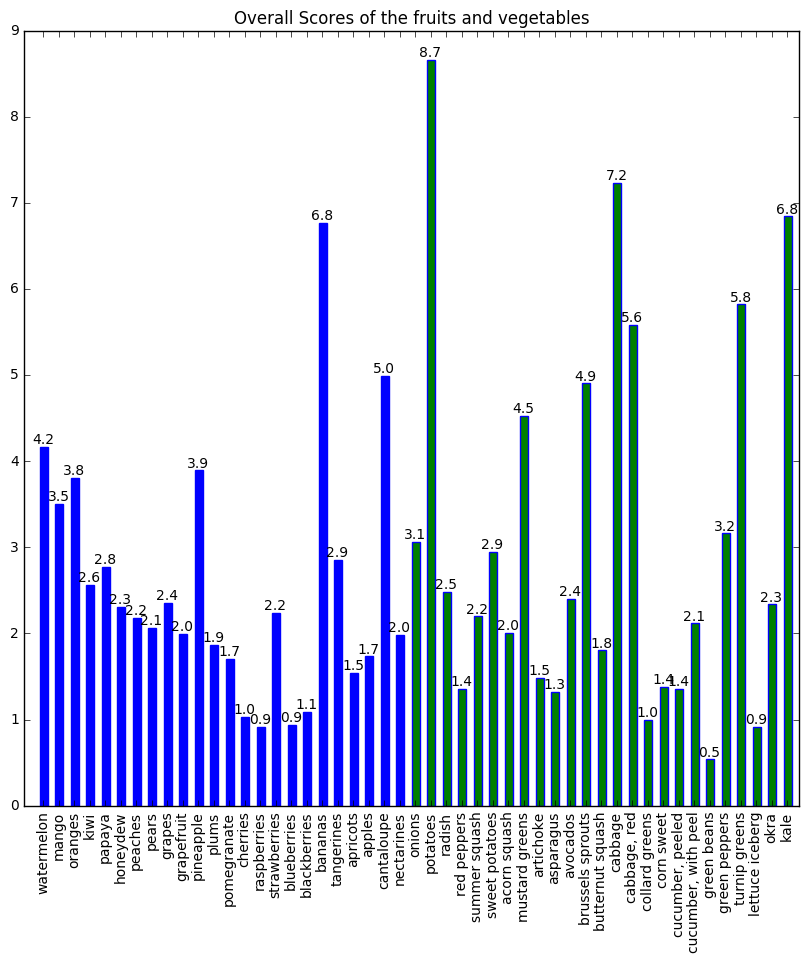

In [119]:
n = len(result['score'])
X = np.arange(n)+1
score=result['score'].tolist()
plt.figure(figsize=(10,10))
plt.bar(X,score,width = 0.5,color = colors,edgecolor = 'blue')
for x,y in zip(X,score):
    plt.text(x+0.2, y,'%.1f' % y, ha='center', va= 'bottom')
plt.xticks(X+0.2,result.food, rotation='vertical')
plt.title('Overall Scores of the fruits and vegetables')
plt.show()


From the plot, we can observe that bananas are still the best among fruits and potatoes are still the best among vegetables and all the foods. The top 3 in fruits did not change, but for the vegetables, cabbage and kale become the second and third best vegetables in the perspective of comprehensive nutrition.